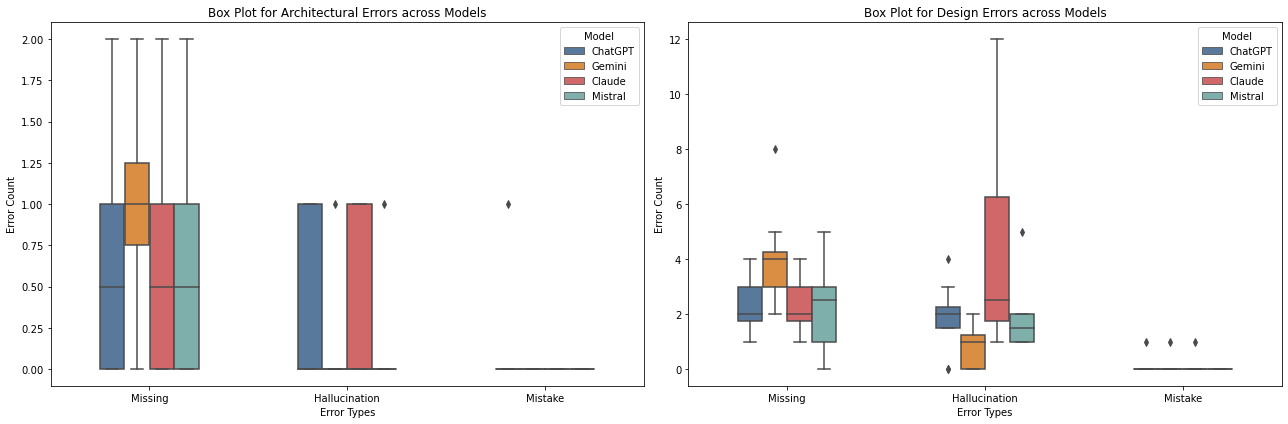

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'detail_ARCH_DESIGN_Analysis.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load sheets
chatgpt_df = excel_data.parse('ChatGPT', header=1)
gemini_df = excel_data.parse('Gemini', header=1)
claude_df = excel_data.parse('Claude', header=1)
mistral_df = excel_data.parse('Mistral', header=1)

# Rename columns for consistency
chatgpt_df.columns = ['Code', 'Missing_Architectural', 'Hallucination_Architectural', 'Mistake_Architectural', 'Missing_Design', 'Hallucination_Design', 'Mistake_Design']
gemini_df.columns = ['Code', 'Missing_Architectural', 'Hallucination_Architectural', 'Mistake_Architectural', 'Missing_Design', 'Hallucination_Design', 'Mistake_Design']
claude_df.columns = ['Code', 'Missing_Architectural', 'Hallucination_Architectural', 'Mistake_Architectural', 'Missing_Design', 'Hallucination_Design', 'Mistake_Design']
mistral_df.columns = ['Code', 'Missing_Architectural', 'Hallucination_Architectural', 'Mistake_Architectural', 'Missing_Design', 'Hallucination_Design', 'Mistake_Design']

# Add model identifiers
chatgpt_df['Model'] = 'ChatGPT'
gemini_df['Model'] = 'Gemini'
claude_df['Model'] = 'Claude'
mistral_df['Model'] = 'Mistral'

# Combine all data
combined_df = pd.concat([chatgpt_df, gemini_df, claude_df, mistral_df])

# Define columns for 'Class' and 'Relation'
class_columns = ['Missing_Architectural', 'Hallucination_Architectural', 'Mistake_Architectural']
relation_columns = ['Missing_Design', 'Hallucination_Design', 'Mistake_Design']

# Melt the data for plotting
melted_df = combined_df.melt(id_vars=['Model'], value_vars=class_columns, var_name='Class Type', value_name='Values')
melted_relation_df = combined_df.melt(id_vars=['Model'], value_vars=relation_columns, var_name='Relation Type', value_name='Values')

# Custom colors for each model
custom_palette = {
    'ChatGPT': '#4E79A7',
    'Gemini': '#F28E2B',
    'Claude': '#E15759',
    'Mistral': '#76B7B2'
}

# Define labels for the x-axis ticks
class_labels = ['Missing', 'Hallucination', 'Mistake']
relation_labels = ['Missing', 'Hallucination', 'Mistake']

# Plot side-by-side box plots with custom colors
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Box plot for 'Class' columns
sns.boxplot(data=melted_df, x='Class Type', y='Values', hue='Model', ax=axes[0], palette=custom_palette, width=0.5, dodge='True', )
axes[0].set_title('Box Plot for Architectural Errors across Models')
axes[0].set_ylabel('Error Count')
axes[0].set_xlabel('Error Types')
axes[0].set_xticklabels(class_labels)
axes[0].legend(title='Model')

# Box plot for 'Relation' columns
sns.boxplot(data=melted_relation_df, x='Relation Type', y='Values', hue='Model', ax=axes[1], palette=custom_palette, width=0.5, dodge='True')
axes[1].set_title('Box Plot for Design Errors across Models')
axes[1].set_ylabel('Error Count')
axes[1].set_xlabel('Error Types')
axes[1].set_xticklabels(relation_labels)
axes[1].legend(title='Model')

# Adjust layout and save as PNG
plt.tight_layout()
output_path = 'detail_box_plots_class_relation_models.png'
plt.savefig(output_path, format='png')
plt.show()

#output_path  # Return the path to the saved image


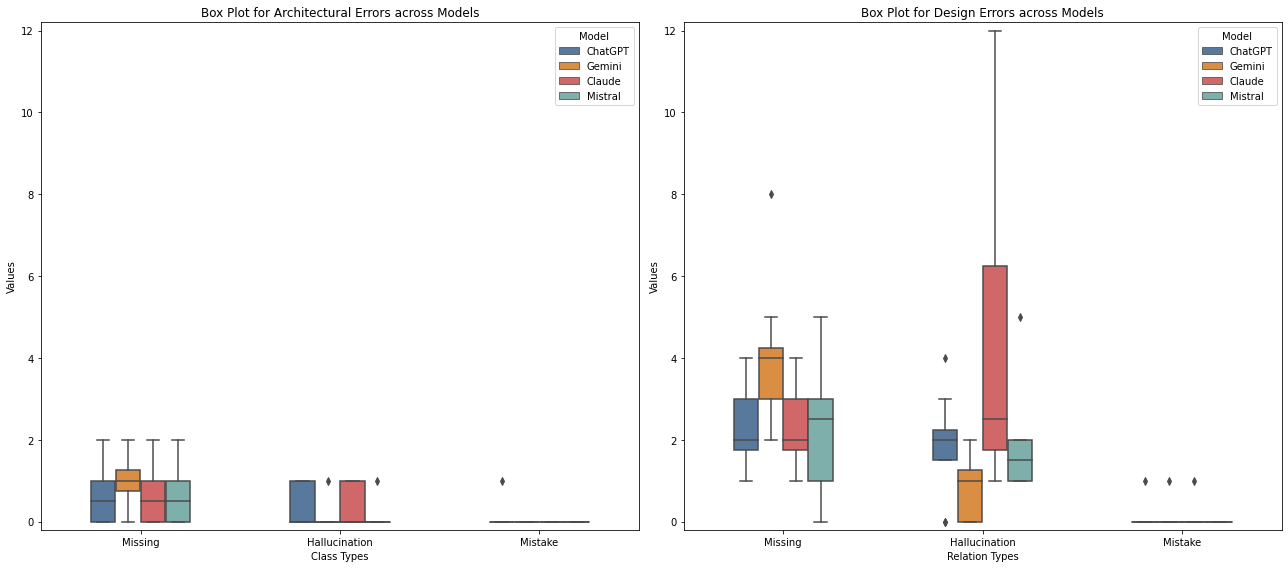

'box_plots_ARCH_DESIGN_models_same_scale.png'

In [3]:
# Determine the global y-axis limits based on the combined data from both plots
y_min = min(melted_df['Values'].min(), melted_relation_df['Values'].min()-0.2)
y_max = max(melted_df['Values'].max(), melted_relation_df['Values'].max()+0.2)

# Plotting the box plots with the same y-axis scale across both plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Box plot for 'Class' columns with adjusted y-axis limits
sns.boxplot(data=melted_df, x='Class Type', y='Values', hue='Model', ax=axes[0], palette=custom_palette ,  width=0.5, dodge='True')
axes[0].set_title('Box Plot for Architectural Errors across Models')
axes[0].set_ylabel('Values')
axes[0].set_xlabel('Class Types')
axes[0].set_xticklabels(class_labels)
axes[0].set_ylim(y_min, y_max)  # Set y-axis limits
axes[0].legend(title='Model')

# Box plot for 'Relation' columns with adjusted y-axis limits
sns.boxplot(data=melted_relation_df, x='Relation Type', y='Values', hue='Model', ax=axes[1], palette=custom_palette,  width=0.5, dodge='True')
axes[1].set_title('Box Plot for Design Errors across Models')
axes[1].set_ylabel('Values')
axes[1].set_xlabel('Relation Types')
axes[1].set_xticklabels(relation_labels)
axes[1].set_ylim(y_min, y_max)  # Set y-axis limits
axes[1].legend(title='Model')

# Adjust layout and save as PNG
plt.tight_layout()
output_path_same_scale = 'box_plots_ARCH_DESIGN_models_same_scale.png'
plt.savefig(output_path_same_scale, format='png')
plt.show()

output_path_same_scale  # Return the path to the saved image with the same y-axis scale
